In [85]:
import numpy as np 
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt 

In [86]:
train_data="/kaggle/input/animals-detection-images-dataset/train"
test_data="/kaggle/input/animals-detection-images-dataset/test"

Spider sample size: 857
Parrot sample size: 422
Scorpion sample size: 81
Sea turtle sample size: 240
Cattle sample size: 71
Fox sample size: 149
Hedgehog sample size: 81
Turtle sample size: 25
Cheetah sample size: 133
Snake sample size: 563
Shark sample size: 304
Horse sample size: 401
Magpie sample size: 62
Hamster sample size: 65
Woodpecker sample size: 172
Eagle sample size: 720
Penguin sample size: 378
Butterfly sample size: 1876
Lion sample size: 209
Otter sample size: 76
Raccoon sample size: 104
Hippopotamus sample size: 77
Bear sample size: 88
Chicken sample size: 389
Pig sample size: 191
Owl sample size: 407
Caterpillar sample size: 495
Koala sample size: 57
Polar bear sample size: 230
Squid sample size: 16
Whale sample size: 288
Harbor seal sample size: 241
Raven sample size: 63
Mouse sample size: 152
Tiger sample size: 314
Lizard sample size: 1201
Ladybug sample size: 393
Red panda sample size: 46
Kangaroo sample size: 99
Starfish sample size: 249
Worm sample size: 129
Tortoi

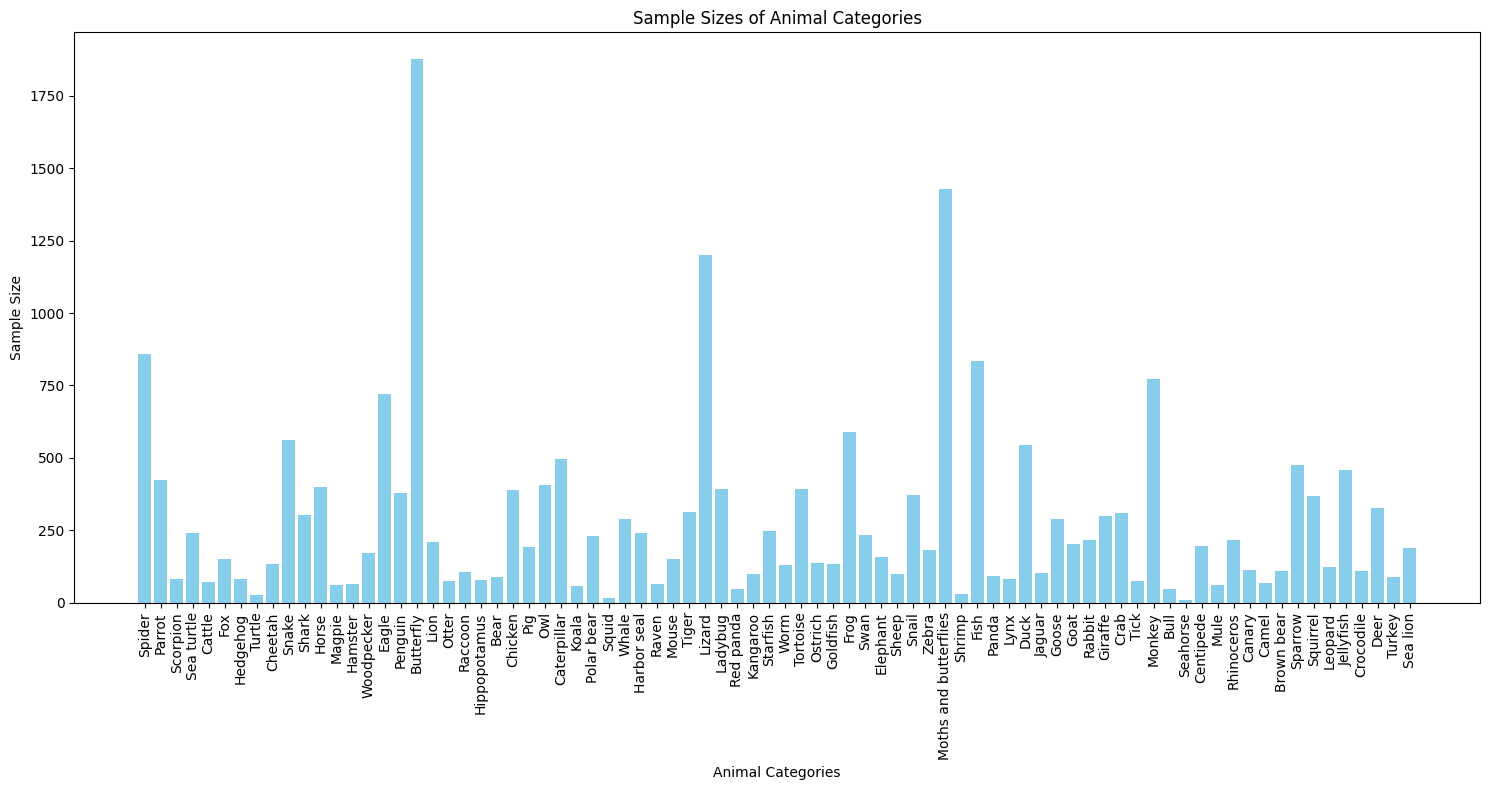

In [87]:
animal_names = os.listdir(train_data)
sample_sizes = []

for animal in animal_names:
    animal_dir = os.path.join(train_data, animal)
    if os.path.isdir(animal_dir):
        num_images = len(os.listdir(animal_dir))
        sample_sizes.append(num_images)
        print(f"{animal} sample size: {num_images}")


plt.figure(figsize=(15, 8))
plt.bar(animal_names, sample_sizes, color='skyblue')
plt.xlabel('Animal Categories')
plt.ylabel('Sample Size')
plt.title('Sample Sizes of Animal Categories')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Spider sample size: 208
Parrot sample size: 181
Scorpion sample size: 45
Sea turtle sample size: 88
Cattle sample size: 172
Fox sample size: 70
Hedgehog sample size: 50
Turtle sample size: 6
Cheetah sample size: 36
Snake sample size: 214
Shark sample size: 59
Horse sample size: 144
Magpie sample size: 34
Hamster sample size: 70
Woodpecker sample size: 33
Eagle sample size: 179
Penguin sample size: 62
Butterfly sample size: 171
Lion sample size: 101
Otter sample size: 62
Raccoon sample size: 52
Hippopotamus sample size: 23
Bear sample size: 40
Chicken sample size: 138
Pig sample size: 97
Owl sample size: 71
Caterpillar sample size: 71
Koala sample size: 25
Polar bear sample size: 56
Squid sample size: 14
Whale sample size: 53
Harbor seal sample size: 62
Raven sample size: 78
Mouse sample size: 84
Tiger sample size: 27
Lizard sample size: 261
Ladybug sample size: 36
Red panda sample size: 43
Kangaroo sample size: 44
Starfish sample size: 56
Worm sample size: 16
Tortoise sample size: 108


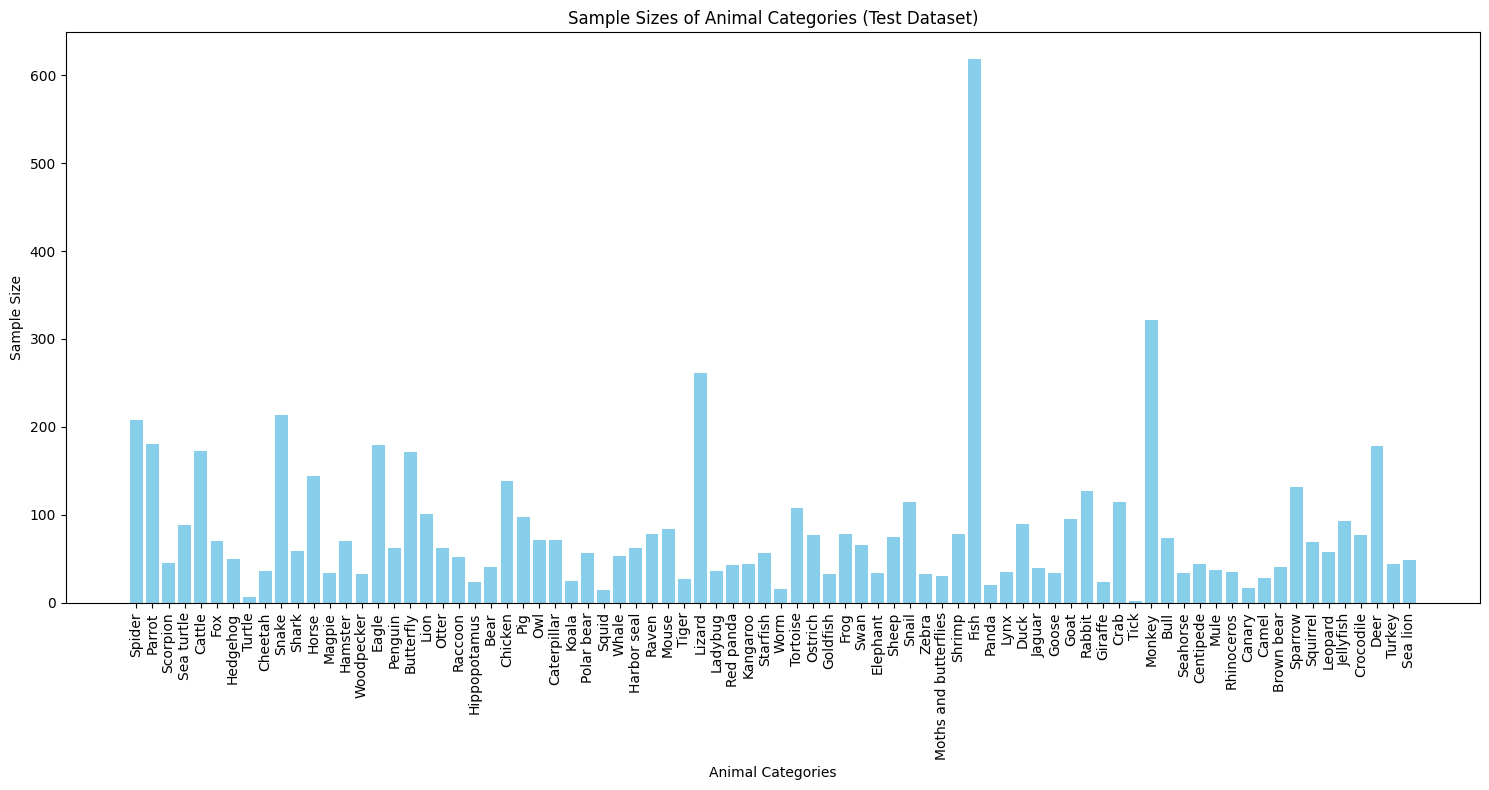

In [88]:
animal_names_test = os.listdir(test_data)
sample_sizes = []

for animal in animal_names_test:
    animal_dir = os.path.join(test_data, animal)
    if os.path.isdir(animal_dir):
        num_images = len(os.listdir(animal_dir))
        sample_sizes.append(num_images)
        print(f"{animal} sample size: {num_images}")

plt.figure(figsize=(15, 8))
plt.bar(animal_names_test, sample_sizes, color='skyblue')
plt.xlabel('Animal Categories')
plt.ylabel('Sample Size')
plt.title('Sample Sizes of Animal Categories (Test Dataset)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [89]:
animals_to_detect = ["Cattle","Pig","Horse","Sheep","Goat","Chicken","Mule","Duck","Fox","Raccoon","Bear","Owl","Zebra"]
animals_encoding = {"Cattle":0,"Pig":1,"Horse":2,"Sheep":3,"Goat":4,"Chicken":5,"Mule":6,"Duck":7,"Fox":8,"Raccoon":9,"Bear":10,"Owl":11,"Zebra":12}

In [90]:
os.mkdir("yolo")
os.mkdir("yolo/test")
os.mkdir("yolo/test/images")
os.mkdir("yolo/test/labels")
os.mkdir("yolo/train")
os.mkdir("yolo/train/images")
os.mkdir("yolo/train/labels")

In [91]:
!cd ./
!ls

yolo


In [92]:
size = (640,640)
for animal_specie in animals_to_detect:
    image_file_name = os.listdir(train_data+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(train_data+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/train/images/"+image_file_name[i], img) 

    image_file_name = os.listdir(test_data+"/"+animal_specie)
    for i in range(0,len(image_file_name)):
            if image_file_name[i] != "Label":
                img = cv2.imread(test_data+"/"+animal_specie+"/"+image_file_name[i], cv2.IMREAD_COLOR)
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, size)
                cv2.imwrite("yolo/test/images/"+image_file_name[i], img) 

In [93]:
def process_files(input_files_path,output_files_path):
    for animal_specie in animals_to_detect:
        txt_file_name = os.listdir(input_files_path+"/"+animal_specie+"/Label")
        for i in range(0,len(txt_file_name)):
                with open(input_files_path+"/"+animal_specie + "/Label/" + txt_file_name[i], "r") as source:
                       with open(output_files_path+"/"+ txt_file_name[i], "w") as destination :
                            image_file_name_no_ext = txt_file_name[i][0:len(txt_file_name[i])-4]
                            img = cv2.imread(input_files_path+"/"+animal_specie+"/"+image_file_name_no_ext+".jpg", cv2.IMREAD_COLOR)
                            height = img.shape[0]
                            width = img.shape[1]
                            for line in source:
                                        labeling_data = line.split()
                                        labeling_data[0] = animals_encoding[labeling_data[0]]
                                        xmin = float(labeling_data[1])
                                        ymin = float(labeling_data[2])
                                        xmax = float(labeling_data[3])
                                        ymax = float(labeling_data[4])
                                        cx = (xmin + xmax)/2.0/width
                                        cy = (ymin + ymax)/2.0/height
                                        box_width = (xmax - xmin)/width
                                        box_height = (ymax - ymin)/height
                                        destination.write(str(labeling_data[0])+" ")
                                        destination.write(str(cx)+" ")
                                        destination.write(str(cy)+" ")
                                        destination.write(str(box_width)+" ")
                                        destination.write(str(box_height)+"\n")

In [94]:
process_files("/kaggle/input/animals-detection-images-dataset/train","yolo/train/labels")
process_files("/kaggle/input/animals-detection-images-dataset/test","yolo/test/labels")

In [96]:
%ls

yolo/


In [97]:
!pip install ultralytics
!pip install pyyaml

In [98]:
yaml_config={
    'train': '/kaggle/working/yolo/train',
    'val' : '/kaggle/working/yolo/train',
    'test': '/kaggle/working/yolo/test',
    'nc': 13,  # Number of classes
    'names': ['Cattle','Pig','Horse','Sheep','Goat','Chicken','Mule','Duck','Fox','Raccoon','Bear','Owl','Zebra']
}


In [99]:
import yaml
yaml_config_path = '/kaggle/working/config.yaml'
with open(yaml_config_path, 'w') as yaml_file:
    yaml.dump(yaml_config, yaml_file, default_flow_style=False)



In [100]:
working_dir = '/kaggle/working/'
files_in_working_dir = os.listdir(working_dir)
print(files_in_working_dir)

['yolo', '.virtual_documents', 'config.yaml']


In [102]:
import ultralytics


In [103]:
!yolo detect train data=/kaggle/working/config.yaml model=yolov8n.yaml pretrained=yolov8n.pt epochs=10 imgsz=640


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

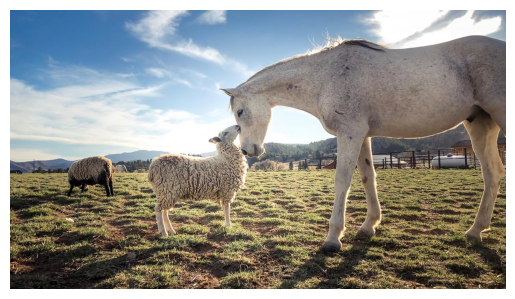

In [104]:
image_path = "/kaggle/input/imgtest/TTT3DX_418135962_776473031.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()




In [105]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt source=/kaggle/input/imgtest/TTT3DX_418135962_776473031.jpg

Ultralytics YOLOv8.0.189 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
YOLOv8n summary (fused): 168 layers, 3008183 parameters, 0 gradients

image 1/1 /kaggle/input/imgtest/TTT3DX_418135962_776473031.jpg: 384x640 1 Horse, 2 Sheeps, 61.5ms
Speed: 6.1ms preprocess, 61.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


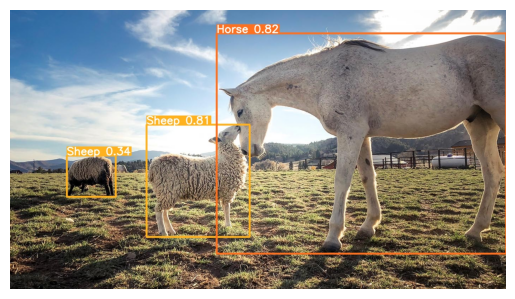

In [106]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "/kaggle/working/runs/detect/predict/TTT3DX_418135962_776473031.jpg"
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()
